EDA [https://www.edureka.co/blog/exploratory-data-analysis-in-python/]


In [16]:
import pandas as pd
import seaborn as sns

admit_predict = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [17]:
print(admit_predict.head())
print(admit_predict.shape)


   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
(500, 9)


In [18]:
admit_predict.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [19]:
admit_predict.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [20]:
admit_predict.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [21]:
admit_predict.drop(columns=['Serial No.'],inplace=True)

In [22]:
admit_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


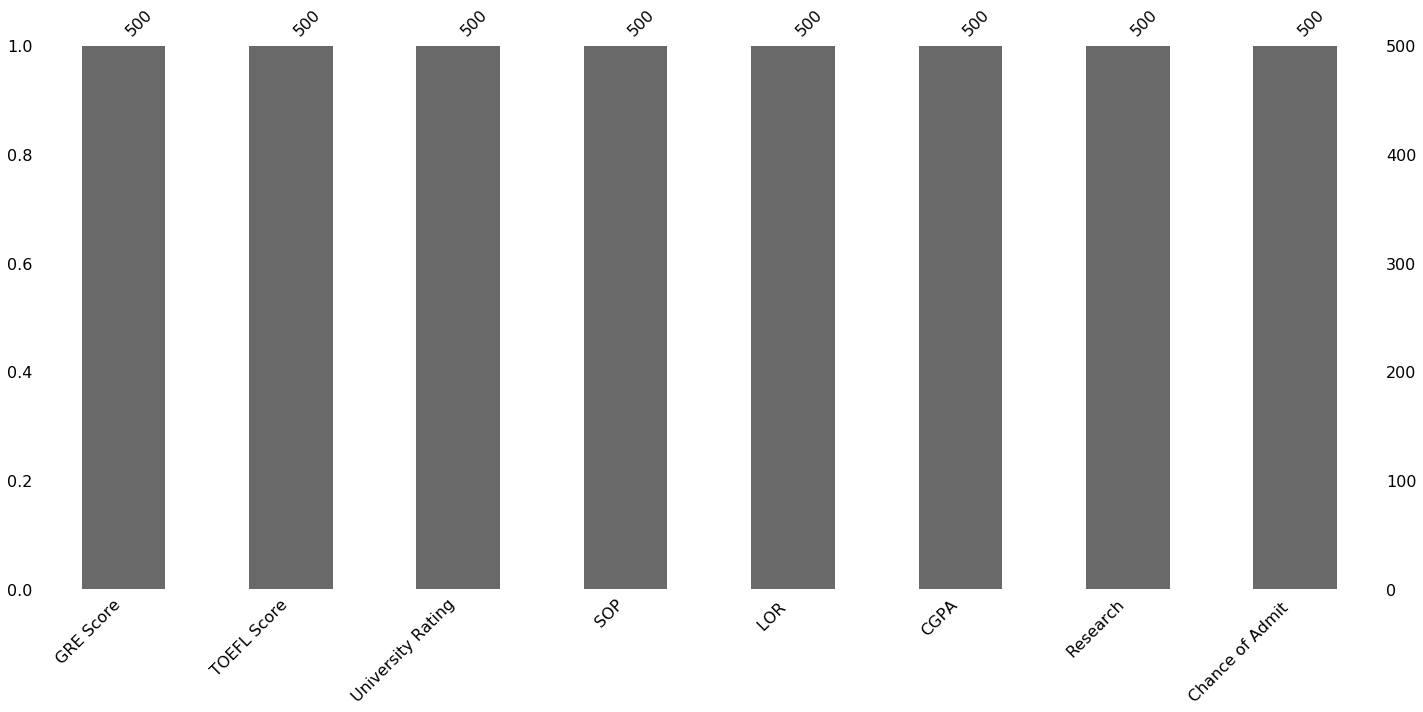

In [23]:
# Visualize the number of missing 
# values as a bar chart 
import missingno as msno
msno.bar(admit_predict) 

In [24]:
!pip3 install missingno

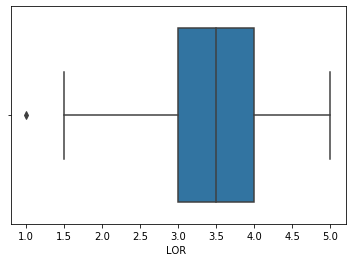

In [25]:
#Outliers
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#boxplot on one column
#admit_predict['LOR '] = admit_predict['LOR '].str.strip()

sns.boxplot(x=admit_predict['LOR '])


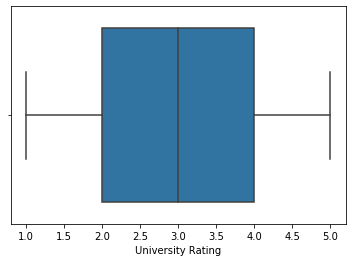

In [26]:
sns.boxplot(x=admit_predict['University Rating'])

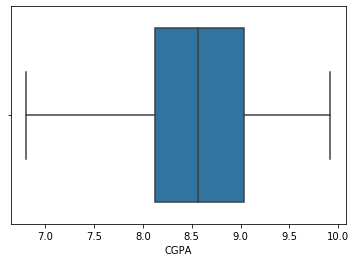

In [27]:
sns.boxplot(x=admit_predict['CGPA'])

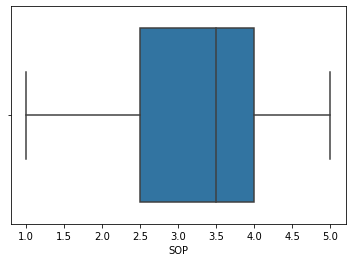

In [28]:
sns.boxplot(x=admit_predict['SOP'])

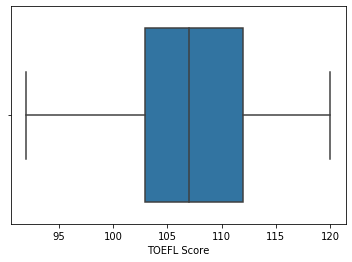

In [29]:
sns.boxplot(x=admit_predict['TOEFL Score'])

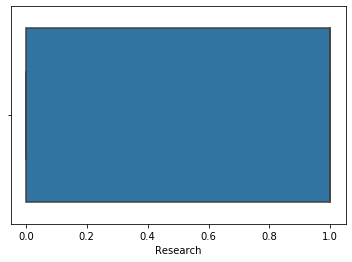

In [30]:
sns.boxplot(x=admit_predict['Research'])

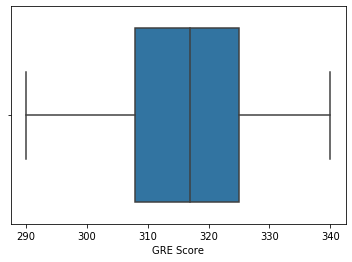

In [31]:
sns.boxplot(x=admit_predict['GRE Score'])

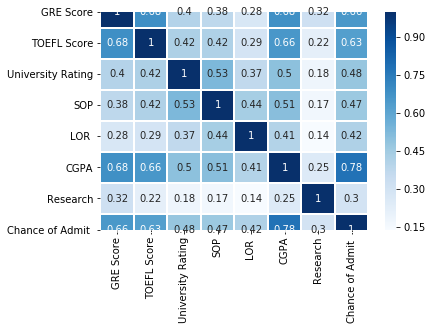

In [32]:
correlation = admit_predict[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']].corr()
sns.heatmap(correlation**2, linewidths=1, annot=True, cmap="Blues");


<b>things to do<br>
trim leading spaces in LOR and chance of admit<br>
remove outliers in LOR<br>
drop serial no column


In [33]:
#admit_predict.drop((admit_predict[(admit_predict['LOR ']<1.0)]).index,inplace=True)


In [34]:
admit_predict.shape

(500, 8)

In [35]:
Q1 = admit_predict.quantile(0.25)
Q3 = admit_predict.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
admit_predict_1 = admit_predict[~((admit_predict < (Q1 - 1.5 * IQR)) |(admit_predict > (Q3 + 1.5 * IQR))).any(axis=1)]
admit_predict_1.shape

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.9125
Research              1.0000
Chance of Admit       0.1900
dtype: float64


(497, 8)

In [37]:
#admit_predict_1.to_csv('C:/Users/SINDHURA/Downloads/Admit_Predict00.csv',index=None, header=True)

In [38]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [42]:
admit_predict_1.isnull().any()
admit_predict_1.columns = admit_predict_1.columns.str.strip()

In [43]:
admit_predict_1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [50]:
X = admit_predict_1[['GRE Score', 'TOEFL Score']].values
y = admit_predict_1['Chance of Admit'].values

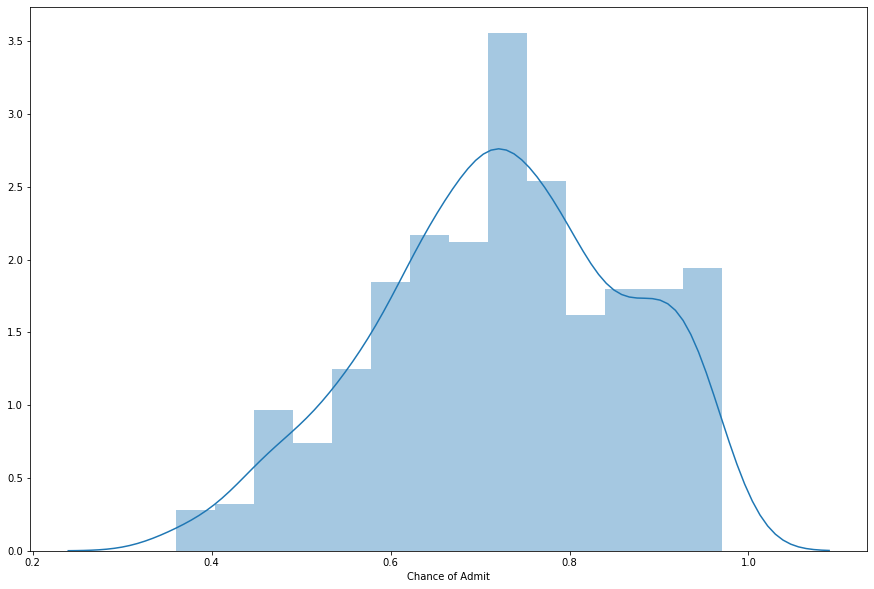

In [48]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(admit_predict_1['Chance of Admit'])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [62]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_pred = regressor.predict(X_test)


In [64]:
y_pred

array([0.72969522, 0.67911437, 0.93136846, 0.88072851, 0.91677326,
       0.69368003, 0.54967837, 0.64306963, 0.68653018, 0.8017256 ,
       0.83756348, 0.66502154, 0.95290665, 0.64321739, 0.7872486 ,
       0.81602529, 0.79445755, 0.72248627, 0.70797972, 0.59275475,
       0.6578126 , 0.72975432, 0.70094808, 0.60723175, 0.7872486 ,
       0.67926213, 0.83759303, 0.62179741, 0.9239231 , 0.86645838,
       0.75847191, 0.78021696, 0.55685777, 0.81596618, 0.70088898,
       0.75850146, 0.68641198, 0.78718949, 0.57121656, 0.54964882,
       0.6072613 , 0.86642882, 0.6433356 , 0.82320469, 0.83765213,
       0.78012831, 0.90238491, 0.84480198, 0.62888815, 0.70812748,
       0.62164965, 0.92401176, 0.70812748, 0.79436889, 0.80881634,
       0.84486108, 0.52799242, 0.78721905, 0.52084258, 0.81608439,
       0.49212499, 0.70821613, 0.50648378, 0.71536598, 0.75135162,
       0.67202363, 0.78015786, 0.56409627, 0.47770709, 0.86642882,
       0.98880364, 0.82323424, 0.57842551, 0.65760573, 0.90232

In [65]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [66]:
df1

,Actual,Predicted
0,0.64,0.729695
1,0.79,0.679114
2,0.94,0.931368
3,0.93,0.880729
4,0.94,0.916773
5,0.54,0.693680
6,0.58,0.549678
7,0.65,0.643070
8,0.57,0.686530
9,0.80,0.801726


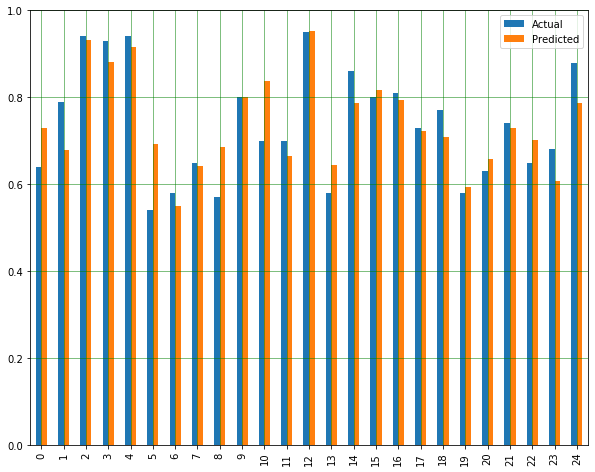

In [67]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.05877463492237563
Mean Squared Error: 0.006328603408243817
Root Mean Squared Error: 0.07955251981077542


In [69]:
admit_predict_1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [70]:
X1 = admit_predict_1[['Research', 'CGPA']].values
y1 = admit_predict_1['Chance of Admit'].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train1, y_train1)
y_pred1 = regressor.predict(X_test1)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

Mean Absolute Error: 0.051411695531599876
Mean Squared Error: 0.004733606592088314
Root Mean Squared Error: 0.06880121068766387


In [71]:
X2 = admit_predict_1[['SOP', 'LOR']].values
y2 = admit_predict_1['Chance of Admit'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.4, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train2, y_train2)
y_pred2 = regressor.predict(X_test2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

Mean Absolute Error: 0.06937222374847808
Mean Squared Error: 0.007958583529757276
Root Mean Squared Error: 0.08921089355990823


In [72]:
X3 = admit_predict_1[['University Rating', 'CGPA']].values
y3 = admit_predict_1['Chance of Admit'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.4, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train3, y_train3)
y_pred3 = regressor.predict(X_test3)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test3, y_pred3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test3, y_pred3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))

Mean Absolute Error: 0.051649726487949243
Mean Squared Error: 0.004745227067533109
Root Mean Squared Error: 0.06888560856618099


# KNN

In [73]:
X4 = admit_predict_1.iloc[:, :-1].values
y4 = admit_predict_1.iloc[:, -1].values

In [114]:
admit_predict_1['isAdmit'] = np.where(admit_predict_1['Chance of Admit']>0.75, 1, 0)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
y4 = admit_predict_1.iloc[:, -1].values

In [116]:
y4

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [117]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.40)

# Feature Scaling for all the columns except target variable

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train4)

X_train4 = scaler.transform(X_train4)
X_test4 = scaler.transform(X_test4)

In [119]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train4)

In [86]:
print(utils.multiclass.type_of_target(encoded))

multiclass


In [120]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train4, y_train4)
y_pred4 = classifier.predict(X_test4)


In [121]:
y_pred4

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0])

In [123]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train4, y_train4)
    pred_i = knn.predict(X_test4)
    error.append(np.mean(pred_i != y_test4))

Text(0, 0.5, 'Mean Error')

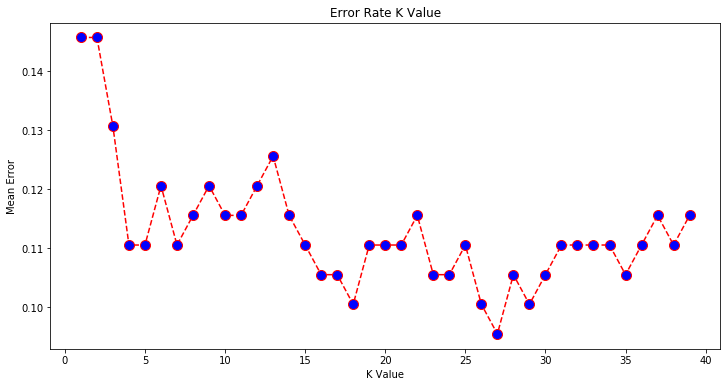

In [124]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [125]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test4, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test4, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test4, y_pred4)))

Mean Absolute Error: 0.11055276381909548
Mean Squared Error: 0.11055276381909548
Root Mean Squared Error: 0.3324947575813722


In [127]:
X5 = admit_predict_1[['GRE Score', 'TOEFL Score']].values
y5 = admit_predict_1.iloc[:, -1].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.40)
scaler = StandardScaler()
scaler.fit(X_train5)

X_train5 = scaler.transform(X_train5)
X_test5 = scaler.transform(X_test5)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train5, y_train5)
y_pred5 = classifier.predict(X_test5)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test5, y_pred5))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test5, y_pred5))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test5, y_pred5)))

Mean Absolute Error: 0.1306532663316583
Mean Squared Error: 0.1306532663316583
Root Mean Squared Error: 0.3614599097156672


In [128]:
X6 = admit_predict_1[['Research', 'CGPA']].values
y6 = admit_predict_1.iloc[:, -1].values
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.40)
scaler = StandardScaler()
scaler.fit(X_train6)

X_train6 = scaler.transform(X_train6)
X_test6 = scaler.transform(X_test6)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train6, y_train6)
y_pred6 = classifier.predict(X_test6)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test6, y_pred6))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test6, y_pred6))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test6, y_pred6)))

Mean Absolute Error: 0.135678391959799
Mean Squared Error: 0.135678391959799
Root Mean Squared Error: 0.36834547908152615


In [130]:
X7 = admit_predict_1[['SOP', 'LOR']].values
y7 = admit_predict_1.iloc[:, -1].values
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.40)
scaler = StandardScaler()
scaler.fit(X_train7)

X_train7 = scaler.transform(X_train7)
X_test7 = scaler.transform(X_test7)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train7, y_train7)
y_pred7 = classifier.predict(X_test7)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test7, y_pred7))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test7, y_pred7))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test7, y_pred7)))

Mean Absolute Error: 0.2613065326633166
Mean Squared Error: 0.2613065326633166
Root Mean Squared Error: 0.511181506574051


In [131]:
X8 = admit_predict_1[['University Rating', 'CGPA']].values
y8 = admit_predict_1.iloc[:, -1].values
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.40)
scaler = StandardScaler()
scaler.fit(X_train8)

X_train8 = scaler.transform(X_train8)
X_test8 = scaler.transform(X_test8)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train8, y_train8)
y_pred8 = classifier.predict(X_test8)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test8, y_pred8))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test8, y_pred8))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test8, y_pred8)))

Mean Absolute Error: 0.12562814070351758
Mean Squared Error: 0.12562814070351758
Root Mean Squared Error: 0.3544406025041679


# Decision Tree Classfier

In [133]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [134]:
X9 = admit_predict_1[['GRE Score', 'TOEFL Score']].values
y9 = admit_predict_1.iloc[:, -1].values
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size=0.40, random_state=42)
clf = DecisionTreeClassifier()

clf = clf.fit(X_train9,y_train9)

#Predict the response for test dataset
y_pred9 = clf.predict(X_test9)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test9, y_pred9))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test9, y_pred9))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test9, y_pred9)))



Mean Absolute Error: 0.18592964824120603
Mean Squared Error: 0.18592964824120603
Root Mean Squared Error: 0.43119560322573564


In [135]:
X10 = admit_predict_1[['Research', 'CGPA']].values
y10 = admit_predict_1.iloc[:, -1].values
X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10, test_size=0.40, random_state=42)
clf = DecisionTreeClassifier()

clf = clf.fit(X_train10,y_train10)

#Predict the response for test dataset
y_pred10 = clf.predict(X_test10)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test10, y_pred10))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test10, y_pred10))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test10, y_pred10)))

Mean Absolute Error: 0.1658291457286432
Mean Squared Error: 0.1658291457286432
Root Mean Squared Error: 0.4072212491123753


In [136]:
X11 = admit_predict_1[['SOP', 'LOR']].values
y11 = admit_predict_1.iloc[:, -1].values
X_train11, X_test11, y_train11, y_test11 = train_test_split(X11, y11, test_size=0.40, random_state=42)
clf = DecisionTreeClassifier()

clf = clf.fit(X_train10,y_train11)

#Predict the response for test dataset
y_pred11 = clf.predict(X_test11)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test11, y_pred11))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test11, y_pred11))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test11, y_pred11)))

Mean Absolute Error: 0.36683417085427134
Mean Squared Error: 0.36683417085427134
Root Mean Squared Error: 0.6056683670576426


In [137]:
X12 = admit_predict_1[['University Rating', 'CGPA']].values
y12 = admit_predict_1.iloc[:, -1].values
X_train12, X_test12, y_train12, y_test12 = train_test_split(X12, y12, test_size=0.40, random_state=42)
clf = DecisionTreeClassifier()

clf = clf.fit(X_train10,y_train12)

#Predict the response for test dataset
y_pred12 = clf.predict(X_test12)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test12, y_pred12))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test12, y_pred12))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test12, y_pred12)))

Mean Absolute Error: 0.19597989949748743
Mean Squared Error: 0.19597989949748743
Root Mean Squared Error: 0.4426961706379302


In [141]:
!pip3 install graphviz
!pip3 install pydotplus





     |████████████████████████████████| 286kB 4.6MB/s eta 0:00:01
  Stored in directory: /Users/connakv/Library/Caches/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [147]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [146]:
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# import pydotplus
# feature_cols  = ['University Rating', 'CGPA']
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('graduate_admission.png')
# Image(graph.create_png())

InvocationException: GraphViz's executables not found